In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd  /content/drive/MyDrive/Colab Notebooks/NLP_A1

/content/drive/MyDrive/Colab Notebooks/NLP_A1


# Header



In [3]:
import re
import sys
from matplotlib import pyplot as plt
import numpy as np

# 1. Tokenization
You have been given two corpuses for cleaning. Your task is to design a tokenizer using regex, which you will later
use for smoothing and language modelling as well.
1. Create a Tokenizer to handle following cases:
* (a) Word Tokenizer
* (b) Punctuation
* (c) URLs
* (d) Hashtags (#manchesterisred)
* (e) Mentions (@john)




2. For the following cases, replace the tokens with appropriate placeholders:
* (a) URLs: `<URL>`
* (b) Hashtags: `<HASHTAG>`
* (c) Mentions: `<MENTION>`
  
You are also encouraged to try other tokenization and placeholder substitution schemes based on your
observations from the corpora used for the smoothing task to achieve a better language model. You may find
percentages, age values, expressions indicating time, time periods occurring in the data. You’re free to explore and
add multiple such reasonable tokenization schemes in addition from the ones listed above. Specify any such
schemes you use in the final README.

In [4]:
def tokenization(sentence):
    # punctuation_re = "[.!?,'\\-:=]"
    punctuation_re = '''!()-[]{};:'"\,<>./?$%^&*_~'''
    my_punct = ['!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.',
           '/', ':', ';', '<', '=', '>', '?', '[', '\\', ']', '^', '_', 
           '`', '{', '|', '}', '~', '»', '«', '“', '”','-']
    punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")
    url_re = "(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    hastag_re = "#(\w+)"
    mentions_re = "@(\w+)"
    words_re = "[\w']+"

    clean_sentence = re.sub(punct_pattern,"", sentence)
    clean_sentence = re.sub(url_re,"<URL>", clean_sentence)
    clean_sentence = re.sub(hastag_re,"<HASHTAG>", clean_sentence)
    clean_sentence = re.sub(mentions_re,"<MENTION>", clean_sentence)
    temp= clean_sentence
   
    if(temp != ' '):
      return temp
    return ''
    

In [ ]:
s = "  -sgsn  #UHVGB fghj - hj -"
sen = tokenization(s)
print(sen)

  sgsn  <HASHTAG> fghj  hj 


# 2. Smoothing
You have been given two corpus: “Pride and Prejudice” corpus, and “Ulysses” corpus. Your task is to design
Language Models for both corpora using smoothing. Ensure that you use the tokenizer created in task 1 for this
task.
1. Create language models with the following parameters:
* (a) On “Pride and Prejudice” corpus:
    
  i. LM 1: tokenization + 4-gram LM + Kneser-Ney smoothing.
    
  ii. LM 2: tokenization + 4-gram LM + Witten-Bell smoothing.
* (b) On “Ulysses” corpus:
    
  i. LM 3: tokenization + 4-gram LM + Kneser-Ney smoothing.
    
  ii. LM 4: tokenization + 4-gram LM + Witten-Bell smoothing.

---





2. For each of these corpora, create a test set by randomly selecting 1000 sentences. This set will not be used
for training the LM.  

* (a) Calculate perplexity score for each sentence of “Pride and Prejudice” corpus and “Ulysses” corpus for
each of the above models and also get average perplexity score on the train corpus.
* (b) Report the perplexity scores for all the sentences in the training set. Report the perplexity score on the
test sentences as well, in the same manner above.

In [5]:
def load_and_read_corpus(file_path):

    #READING THE CORPUS
    file = open(file_path, 'r', encoding='utf-8')
    data_corpus = file.read()

    #SPLITTING THE FILE INTO LINES
    data_corpus = data_corpus.split("\n")

    clean_data_corpus = []
    for sentence in data_corpus:
        clean_sentence = tokenization(sentence)
        clean_sentence = clean_sentence.lower().strip()
        if clean_sentence != '':
          clean_sentence = '<s> '+'<s> ' + '<s> ' + clean_sentence + ' </s>'+' </s>'+' </s>'
          clean_data_corpus.append(clean_sentence)
       
    return clean_data_corpus

In [ ]:
data = load_and_read_corpus('Ulysses - James Joyce.txt')

In [ ]:
data[0:10]

['<s> <s> <s> the project gutenberg ebook of ulysses by james joyce </s> </s> </s>',
 '<s> <s> <s> this ebook is for the use of anyone anywhere in the united states and </s> </s> </s>',
 '<s> <s> <s> most other parts of the world at no cost and with almost no restrictions </s> </s> </s>',
 '<s> <s> <s> whatsoever you may copy it give it away or reuse it under the terms </s> </s> </s>',
 '<s> <s> <s> of the project gutenberg license included with this ebook or online at </s> </s> </s>',
 '<s> <s> <s> wwwgutenbergorg if you are not located in the united states you </s> </s> </s>',
 '<s> <s> <s> will have to check the laws of the country where you are located before </s> </s> </s>',
 '<s> <s> <s> using this ebook </s> </s> </s>',
 '<s> <s> <s> title ulysses </s> </s> </s>',
 '<s> <s> <s> author james joyce </s> </s> </s>']

In [6]:
#TRAINING AND TESTING CORPUS I am selecting the last n lines as test data
def split_train_test_data_corpus(data_corpus,n):

    print("Total Number of data : ",len(data_corpus))
    train_corpus = data_corpus[:-n]
    print(len(train_corpus))
    test_corpus = data_corpus[-n:]
    print(len(test_corpus))
    
    return train_corpus, test_corpus

In [7]:
def update_dictionary(sen,dict_corpus, unique_words, bigram_corpus, trigram_corpus, quadgram_corpus):
  n=-1
  sentence = sen.split()
  for word in sentence:
      n += 1
      if word not in unique_words:
          # count += 1
          unique_words[word] = 1
          dict_corpus[word] = 1
      else:
          unique_words[word] += 1
          dict_corpus[word] +=1
      #FORMING BI-GRAM
      if n > 0:
          key = sentence[n-1] + ' ' + sentence[n]
          if key not in bigram_corpus:
              bigram_corpus[key] = 1
          else:
              bigram_corpus[key] += 1
              
      #FORMING TRI-GRAM
      if n > 1:
          key = sentence[n-2] + ' ' + sentence[n-1] + ' ' + sentence[n]
          if key not in trigram_corpus:
              trigram_corpus[key] = 1
          else:
              trigram_corpus[key] += 1
      
      #FORMING QUAD-GRAM
      if n>1:
          key =  sentence[n-3] + ' ' + sentence[n-2] + ' ' + sentence[n-1] + ' ' + sentence[n]
          if key not in quadgram_corpus:
              quadgram_corpus[key] = 1
          else:
              quadgram_corpus[key] += 1
  return dict_corpus, unique_words, bigram_corpus, trigram_corpus, quadgram_corpus

In [8]:
#LANGUAGE MODELLING
def build_language_model(train_corpus):
    # count = 0
    unique_words = {}
    dict_corpus = {}
    bigram_corpus = {}
    trigram_corpus = {}
    quadgram_corpus = {}
    for sentence in train_corpus:
        dict_corpus, unique_words, bigram_corpus, trigram_corpus, quadgram_corpus = update_dictionary(sentence,dict_corpus, unique_words, bigram_corpus, trigram_corpus, quadgram_corpus)
        
    return dict_corpus, unique_words, bigram_corpus, trigram_corpus, quadgram_corpus

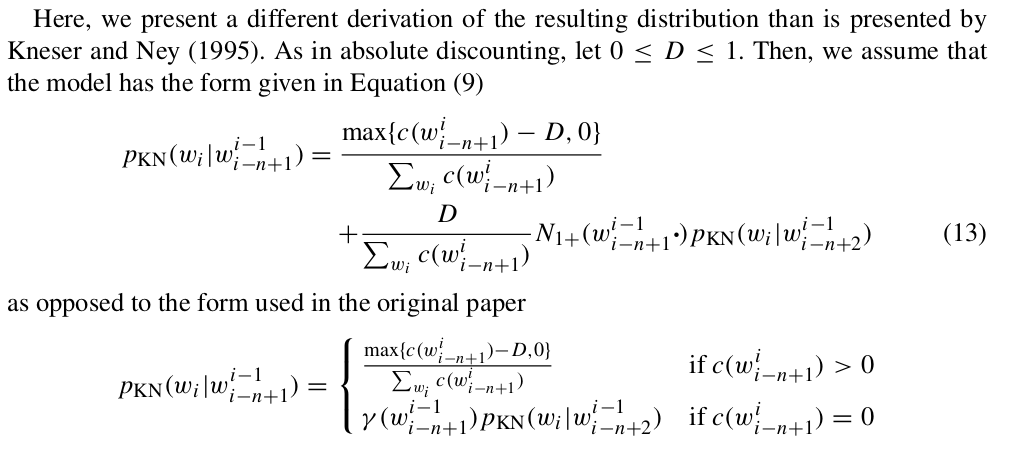

In [9]:
#SMOOTHING TYPE : Kneyser-Ney Smoothing
def Kneyser_Ney_Smoothing(sentence, dict_corpus, bigram_corpus, trigram_corpus, quadgram_corpus):
    t_sentence = sentence.split()
    i = -1
    p = 1.0
    # print(sentence)
    for word in t_sentence:
        i += 1
        if (i > 2):
            # print(i,i-1,i-2,i-3,len(t_sentence))
            unigram_key = t_sentence[i-1]
            bigram_key = t_sentence[i-2] + ' ' + t_sentence[i-1]
            trigram_key = t_sentence[i-3] + ' ' + t_sentence[i-2] + ' ' + t_sentence[i-1]
            quadgram_key = t_sentence[i-3] + ' ' + t_sentence[i-2] + ' ' + t_sentence[i-1] + ' ' +  t_sentence[i]
            start=0
            end=0
            if (quadgram_key in quadgram_corpus.keys()):
                p *= (quadgram_corpus[quadgram_key] - 0.75) / trigram_corpus[trigram_key]                   
            elif (trigram_key in trigram_corpus.keys()):

                for key in trigram_corpus.keys():
                    if key.endswith(word):
                        end += 1
                    if key.startswith(bigram_key):
                        start += 1
                    
                if ((bigram_corpus[bigram_key] > 0) and (start > 0) and (end > 0)):
                    p *= ((0.75/bigram_corpus[bigram_key]) * (start) * ((end) / len(trigram_corpus)))
            elif(bigram_key in bigram_corpus.keys()): 

                for key in bigram_corpus.keys():
                    if key.endswith(word):
                        end += 1
                    if key.startswith(unigram_key):
                        start += 1
                    
                if ((dict_corpus[unigram_key] > 0) and (start > 0) and (end > 0)):
                    p *= ((0.75/dict_corpus[unigram_key]) * (start) * ((end) / len(bigram_corpus)))
            else:
                while (end == 0):
                    start += 1
                    for value in dict_corpus.values():
                      if(value==start):
                        end += value
                p *= (end / len(dict_corpus))
            
    n = len(t_sentence)          
    perplexity_score= (1/p)**(1/float(n))
    return p, perplexity_score


# WITTEN Bell

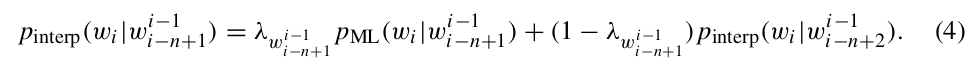

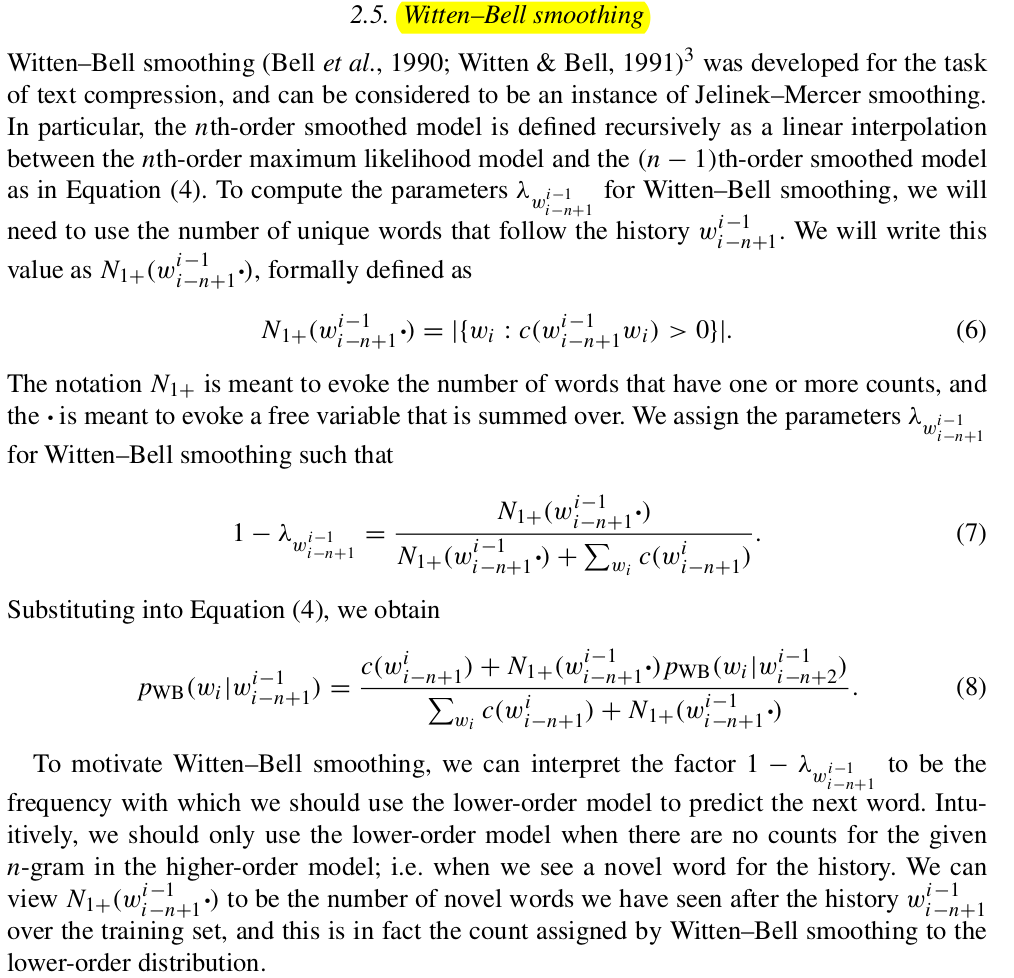

In [10]:
def find_z_value(words,dict,n,t):
  z=0
  ans=0
  for key in dict.keys():
    if (key.startswith(words)):
      z += 1
  if z>0:
    if n>0:
      if t>0:
        ans = (n/(z*(t+n)))
  return ans

In [11]:
#SMOOTHING TYPE : Witten-Bell Smoothing
def Witten_Bell_Smoothing(sentence, dict_corpus, bigram_corpus, trigram_corpus, quadgram_corpus):

    test_unique_words = {}
    test_dict_corpus = {}
    test_bigram_corpus = {}
    test_trigram_corpus = {}
    test_quadgram_corpus = {}
    test_dict_corpus , test_unique_words , test_bigram_corpus,test_trigram_corpus, test_quadgram_corpus = update_dictionary(sentence,test_dict_corpus , test_unique_words , test_bigram_corpus,test_trigram_corpus, test_quadgram_corpus)
    
    t_sentence = sentence.split()
    n = len(t_sentence)
    dict_value = len(test_unique_words.keys())
    i = -1
    temp_dict = {}
    p = 1
    c_dict = 0
    t_dict = 0
    for word in t_sentence:
        try:
            i = i + 1
            t_dict += 1
            if(word not in temp_dict.keys()):
                c_dict += 1
                temp_dict[word] = 1
                
            if (i > 2):
                unigram_key = t_sentence[i-1]
                bigram_key = t_sentence[i-2] + ' ' + t_sentence[i-1]
                trigram_key = t_sentence[i-3] + ' ' + t_sentence[i-2] + ' ' + t_sentence[i-1]
                quadgram_key = t_sentence[i-3] + ' ' + t_sentence[i-2] + ' ' + t_sentence[i-1] + ' ' +  t_sentence[i]

                t_value = n - t_dict    # remaining words
                n_value = dict_value - c_dict # remainig unique words
                
                if quadgram_key in quadgram_corpus.keys(): 
                    p *= (quadgram_corpus[quadgram_key]) / (n_value + t_value)
                
                else:
                    ans = find_z_value(trigram_key,test_quadgram_corpus,n_value,t_value)
                    if(ans>0):
                      p *= ans
                    if trigram_key in trigram_corpus.keys():
                      p *=  (trigram_corpus[trigram_key]) / (n_value + t_value)
                    else: 
                        ans = find_z_value(bigram_key,test_trigram_corpus,n_value,t_value)
                        if(ans>0):
                            p *= ans
                        if bigram_key in bigram_corpus.keys():
                            p *= (bigram_corpus[bigram_key]) / (n_value + t_value)
                        else:
                            ans = find_z_value(unigram_key,test_bigram_corpus,n_value,t_value)
                            if(ans>0):
                                p *= ans
                            n_1 = 0
                            curr = 0
                            while (n_1 == 0):
                                curr += 1
                                for value in dict_corpus.values():
                                    if curr == value:
                                      n_1 += value
                            l = len(dict_corpus)
                            p *= (n_1/l)
        except:
              continue
    pr_score= (1/p)**(1/float(n))
    return p, pr_score

# TEST

In [12]:
file_path1 = 'Pride and Prejudice - Jane Austen.txt'
file_path2 = 'Ulysses - James Joyce.txt'
dest_path = '2021201023_LM'



In [23]:

data_corpus = load_and_read_corpus(file_path2)
training_corpus, testing_corpus = split_train_test_data_corpus(data_corpus,1000)
dict_corpus, unique_words, bigram_corpus, trigram_corpus, quadgram_corpus = build_language_model(training_corpus)

Total Number of data :  25772
24772
1000


In [27]:
smooth = "w"
# file_path = "/content/europarl-corpus.txt"
train_file = dest_path + '4_train-perplexity.txt'
test_file = dest_path + '4_test-perplexity.txt'

In [28]:
# def LM(file_path,smooth,dest_path):
    # 'Ulysses - James Joyce.txt','k','2021201023_LM1'
    
train_perplexity_k = []
test_perplexity_k = []
file1 = open(train_file,"w+")
for training_sentence in training_corpus:
    if smooth == "k" :
        pr, pr_score = Kneyser_Ney_Smoothing(training_sentence, dict_corpus, bigram_corpus, trigram_corpus, quadgram_corpus)
        train_perplexity_k.append(pr_score)
        file1.write("{}\t{}\n".format(training_sentence,pr_score))
        
    if smooth == "w":
        pr, pr_score = Witten_Bell_Smoothing(training_sentence, dict_corpus, bigram_corpus, trigram_corpus, quadgram_corpus)
        train_perplexity_k.append(pr_score)
        file1.write("{}\t{}\n".format(training_sentence,pr_score))
        
file1.close()

fp = open(train_file,"r")
line=fp.readlines()
avg = np.mean(train_perplexity_k)
line.insert(0,str(avg)+"\n")
fp.close()
fp = open(train_file,"w+")
fp.writelines(line)
fp.close()


print(smooth)
file2 = open(test_file,"w+")
i=1
for testing_sentence in testing_corpus:
    # print(i)
    # i += 1
    # print(testing_sentence)
    if smooth == 'k' :
      # print("Fghjk")
      pr, pr_score = Kneyser_Ney_Smoothing(testing_sentence, dict_corpus, bigram_corpus, trigram_corpus, quadgram_corpus)
      # print(pr_score)
      test_perplexity_k.append(pr_score)
      file2.write("{}\t{}\n".format(testing_sentence,pr_score))
      
    if smooth == 'w' :
      # print("dfghj")
      pr, pr_score = Witten_Bell_Smoothing(testing_sentence, dict_corpus, bigram_corpus, trigram_corpus, quadgram_corpus)
      test_perplexity_k.append(pr_score)
      file2.write("{}\t{}\n".format(testing_sentence,pr_score))
  
        
                
file2.close()

# print(test_perplexity_k)

fp = open(test_file,"r")
line=fp.readlines()
avg = np.mean(test_perplexity_k)
line.insert(0,str(avg)+"\n")
fp.close()
fp = open(test_file,"w+")
fp.writelines(line)
fp.close()



w


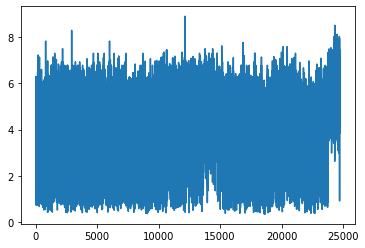

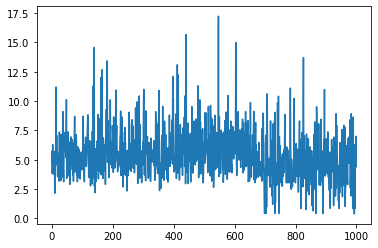

In [29]:
plt.plot(train_perplexity_k)
plt.show()
plt.plot(test_perplexity_k)
plt.show()